<a href="https://colab.research.google.com/github/sgr1118/FD/blob/main/FD24_TF2_API(220818).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 24-3. Tensorflow2 API로 모델 작성하기: MNIST (1) Sequential API 활용

In [ ]:
# 라이브러리 불러오기

import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
# 데이터 구성부분
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train=x_train[...,np.newaxis]
x_test=x_test[...,np.newaxis]

print(len(x_train), len(x_test))

11490434/11490434 [==============================] - 0s 0us/step
60000 10000


In [ ]:
# Sequential 모델 구현

"""
Spec:
1. 32개의 채널을 가지고, 커널의 크기가 3, activation function이 relu인 Conv2D 레이어
2. 64개의 채널을 가지고, 커널의 크기가 3, activation function이 relu인 Conv2D 레이어
3. Flatten 레이어
4. 128개의 아웃풋 노드를 가지고, activation function이 relu인 Fully-Connected Layer(Dense)
5. 데이터셋의 클래스 개수에 맞는 아웃풋 노드를 가지고, activation function이 softmax인 Fully-Connected Layer(Dense)"""


model = keras.Sequential([
keras.layers.Conv2D(32, 3, activation='relu'),
keras.layers.Conv2D(64, 3, activation='relu'),
keras.layers.Flatten(),
keras.layers.Dense(128, activation='relu'),
keras.layers.Dense(10, activation='softmax')
])

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# 24-4. Tensorflow2 API로 모델 작성하기: MNIST (2) Functional API 활용

In [ ]:
# 라이브러리 불러오기

import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
#  Functional 모델 구현

"""
Spec:
0. (28X28X1) 차원으로 정의된 Input
1. 32개의 채널을 가지고, 커널의 크기가 3, activation function이 relu인 Conv2D 레이어
2. 64개의 채널을 가지고, 커널의 크기가 3, activation function이 relu인 Conv2D 레이어
3. Flatten 레이어
4. 128개의 아웃풋 노드를 가지고, activation function이 relu인 Fully-Connected Layer(Dense)
5. 데이터셋의 클래스 개수에 맞는 아웃풋 노드를 가지고, activation function이 softmax인 Fully-Connected Layer(Dense)
"""

input = keras.Input(shape=(28,28,1))
x = keras.layers.Conv2D(32, 3, activation='relu')(input)
x = keras.layers.Conv2D(64, 3, activation='relu')(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(128, activation='relu')(x)
predictions = keras.layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs = input, outputs = predictions)

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# 24-5. Tensorflow2 API로 모델 작성하기: MNIST (3) Subclassing 활용

In [ ]:
# 라이브러리 불러오기

import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
# Subclassing모델 구현.
"""
Spec:
0. keras.Model 을 상속받았으며, __init__()와 call() 메서드를 가진 모델 클래스
1. 32개의 채널을 가지고, 커널의 크기가 3, activation function이 relu인 Conv2D 레이어
2. 64개의 채널을 가지고, 커널의 크기가 3, activation function이 relu인 Conv2D 레이어
3. Flatten 레이어
4. 128개의 아웃풋 노드를 가지고, activation function이 relu인 Fully-Connected Layer(Dense)
5. 데이터셋의 클래스 개수에 맞는 아웃풋 노드를 가지고, activation function이 softmax인 Fully-Connected Layer(Dense)
6. call의 입력값이 모델의 Input, call의 리턴값이 모델의 Output
"""

class CustomModel(keras.Model):
  def __init__(self):
    super().__init__()
    self.conv1 = keras.layers.Conv2D(32, 3, activation = 'relu')
    self.conv2 = keras.layers.Conv2D(64, 3, activation = 'relu')
    self.flatten = keras.layers.Flatten()
    self.fc1 =  keras.layers.Dense(128, activation='relu')
    self.fc2 = keras.layers.Dense(10, activation='softmax')

  def call(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.flatten(x)
    x = self.fc1(x)
    x = self.fc2(x)

    return x

model = CustomModel()

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# 24-6. TensorFlow2 API로 모델 작성 및 학습하기: CIFAR-100 (1) Sequential API 활용

In [ ]:
import tensorflow as tf
from tensorflow import keras

# 데이터 구성부분
cifar100 = keras.datasets.cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(len(x_train), len(x_test))

169001437/169001437 [==============================] - 4s 0us/step
50000 10000


In [ ]:
# Sequential Model을 구성해주세요.
"""
Spec:
1. 16개의 채널을 가지고, 커널의 크기가 3, activation function이 relu인 Conv2D 레이어
2. pool_size가 2인 MaxPool 레이어
3. 32개의 채널을 가지고, 커널의 크기가 3, activation function이 relu인 Conv2D 레이어
4. pool_size가 2인 MaxPool 레이어
5. Flatten 레이어
6. 256개의 아웃풋 노드를 가지고, activation function이 relu인 Fully-Connected Layer(Dense)
7. 데이터셋의 클래스 개수에 맞는 아웃풋 노드를 가지고, activation function이 softmax인 Fully-Connected Layer(Dense)
"""

model = keras.Sequential([
    keras.layers.Conv2D(16, 3, activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(32, 3, activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
    ])

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# 24-7. Tensorflow2 API로 모델 작성 및 학습하기: CIFAR-100 (2) Functional API 활용

In [ ]:
import tensorflow as tf
from tensorflow import keras

# 데이터 구성부분
cifar100 = keras.datasets.cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(len(x_train), len(x_test))

50000 10000


In [ ]:
# Functional API를 활용한 Model을 구성해주세요.
"""
Spec:
0. (32X32X3) 차원으로 정의된 Input
1. 16개의 채널을 가지고, 커널의 크기가 3, activation function이 relu인 Conv2D 레이어
2. pool_size가 2인 MaxPool 레이어
3. 32개의 채널을 가지고, 커널의 크기가 3, activation function이 relu인 Conv2D 레이어
4. pool_size가 2인 MaxPool 레이어
5. Flatten 레이어
6. 256개의 아웃풋 노드를 가지고, activation function이 relu인 Fully-Connected Layer(Dense)
7. 데이터셋의 클래스 개수에 맞는 아웃풋 노드를 가지고, activation function이 softmax인 Fully-Connected Layer(Dense)
"""

# 여기에 모델을 구성해주세요

input = keras.Input(shape = (32,32,3))

x = keras.layers.Conv2D(16, 3, activation = 'relu')(input)
x = keras.layers.MaxPool2D(2,2)(x)
x = keras.layers.Conv2D(32, 3, activation = 'relu')(x)
x = keras.layers.MaxPool2D(2,2)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation = 'relu')(x)
prediction = keras.layers.Dense(100, activation = 'softmax')(x)


model = keras.Model(inputs = input, outputs = prediction)

# 24-8. Tensorflow2 API로 모델 작성 및 학습하기: CIFAR-100 (3) Subclassing 활용

In [ ]:
import tensorflow as tf
from tensorflow import keras

# 데이터 구성부분
cifar100 = keras.datasets.cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(len(x_train), len(x_test))

50000 10000


In [ ]:
# Subclassing을 활용한 Model을 구성해주세요.
"""
Spec:
0. keras.Model 을 상속받았으며, __init__()와 call() 메서드를 가진 모델 클래스
1. 16개의 채널을 가지고, 커널의 크기가 3, activation function이 relu인 Conv2D 레이어
2. pool_size가 2인 MaxPool 레이어
3. 32개의 채널을 가지고, 커널의 크기가 3, activation function이 relu인 Conv2D 레이어
4. pool_size가 2인 MaxPool 레이어
5. Flatten 레이어
6. 256개의 아웃풋 노드를 가지고, activation function이 relu인 Fully-Connected Layer(Dense)
7. 데이터셋의 클래스 개수에 맞는 아웃풋 노드를 가지고, activation function이 softmax인 Fully-Connected Layer(Dense)
8. call의 입력값이 모델의 Input, call의 리턴값이 모델의 Output
"""

class CustomModel(keras.Model):
  def __init__(self):
    super().__init__()
    self.conv1 = keras.layers.Conv2D(16, 3, activation = 'relu')
    self.pool1 = keras.layers.MaxPool2D(2,2)
    self.conv2 = keras.layers.Conv2D(32, 3, activation = 'relu')
    self.pool2 = keras.layers.MaxPool2D(2,2)
    self.flatten = keras.layers.Flatten
    self.fc1 = keras.layers.Dense(256, activation = 'relu')
    self.fc2 = keras.layers.Dense(10, activation = 'softmax')

    def call(self, x):
      x = self.conv1(x)
      x = self.pool1(x)
      x = self.conv2(x)
      x = self.pool2(x)
      x = self.flatten(x)
      x = self.fc1(x)
      x = self.fc2(x)

      return x

model = CustomModel()

In [ ]:
class CustomModel(keras.Model):
    def __init__(self):
        super().__init__()
        self.conv1 = keras.layers.Conv2D(16, 3, activation='relu')
        self.maxpool1 = keras.layers.MaxPool2D((2,2))
        self.conv2 = keras.layers.Conv2D(32, 3, activation='relu')
        self.maxpool2 = keras.layers.MaxPool2D((2,2))
        self.flatten = keras.layers.Flatten()
        self.fc1 = keras.layers.Dense(256, activation='relu')
        self.fc2 = keras.layers.Dense(100, activation='softmax')
        
    def call(self, x):
        x = self.conv1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.maxpool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        
        return x
        
model = CustomModel()

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5


UnimplementedError: ignored

# 24-9. GradientTape의 활용

In [ ]:
import tensorflow as tf
from tensorflow import keras

# 데이터 구성부분
cifar100 = keras.datasets.cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(len(x_train), len(x_test))

# 모델 구성부분
class CustomModel(keras.Model):
    def __init__(self):
        super().__init__()
        self.conv1 = keras.layers.Conv2D(16, 3, activation='relu')
        self.maxpool1 = keras.layers.MaxPool2D((2,2))
        self.conv2 = keras.layers.Conv2D(32, 3, activation='relu')
        self.maxpool2 = keras.layers.MaxPool2D((2,2))
        self.flatten = keras.layers.Flatten()
        self.fc1 = keras.layers.Dense(256, activation='relu')
        self.fc2 = keras.layers.Dense(100, activation='softmax')

    def call(self, x):
        x = self.conv1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.maxpool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)

        return x

model = CustomModel()

169001437/169001437 [==============================] - 11s 0us/step
50000 10000


In [ ]:
loss_func = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

# tf.GradientTape()를 활용한 train_step
def train_step(features, labels):
    with tf.GradientTape() as tape:
        predictions = model(features)
        loss = loss_func(labels, predictions)
        gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

In [ ]:
import time
import numpy as np

def train_model(batch_size=32):
    start = time.time()
    for epoch in range(5):
        x_batch = []
        y_batch = []
        for step, (x, y) in enumerate(zip(x_train, y_train)):
            x_batch.append(x)
            y_batch.append(y)
            if step % batch_size == batch_size-1:
                loss = train_step(np.array(x_batch, dtype=np.float32), np.array(y_batch, dtype=np.float32))
                x_batch = []
                y_batch = []
        print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))
    print("It took {} seconds".format(time.time() - start))

train_model()

UnimplementedError: ignored

In [ ]:
# evaluation
prediction = model.predict(x_test, batch_size=x_test.shape[0], verbose=1)
temp = sum(np.squeeze(y_test) == np.argmax(prediction, axis=1))
temp/len(y_test)  # Accuracy

In [ ]:
model = keras.Sequential([
    keras.Input(shape=(150,150,3)),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.Conv2D(64, 3, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 flatten_3 (Flatten)         (None, 1364224)           0         
                                                                 
 dense_6 (Dense)             (None, 128)               174620800 
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 174,641,482
Trainable params: 174,641,482
Non-trainable params: 0
_________________________________________________________________


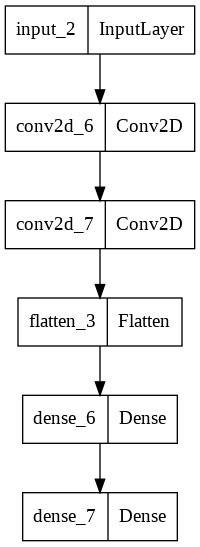

In [ ]:
from IPython.display import SVG #jupyter notebook에-
model.summary()
tf.keras.utils.plot_model(model)

In [ ]:
inputs = keras.Input(shape=(28, 28, 1))

x = keras.layers.Conv2D(32, 3, activation='relu')(inputs)
x = keras.layers.Conv2D(64, 3, activation='relu')(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(128, activation='relu')(x)
predictions = keras.layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=predictions)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 flatten_2 (Flatten)         (None, 36864)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               4718720   
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 4,738,826
Trainable params: 4,738,826
Non-train

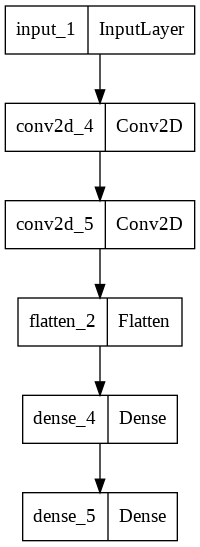

In [ ]:
from IPython.display import SVG #jupyter notebook에-
model.summary()
tf.keras.utils.plot_model(model)

In [ ]:
step = 10
batch_size = 3

step % batch_size

1